In [171]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [172]:
#Read in the csv file and convert to a Pandas dataframe
jobs_df = pd.read_csv('./data/Jadarat_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [173]:
jobs_df.shape

(1470, 18)

In [174]:
jobs_df.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both


In [175]:
jobs_df.dtypes

job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
job_post_id      int64
exper           object
gender          object
dtype: object

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [176]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


In [177]:
jobs_df.describe(include='object')

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,exper,gender
count,1470,1470,1470,1470,1470,1470,1470,1456,1380,780,1470,1470,1470,1470,1470,1470,1470
unique,324,92,438,444,886,894,2,7,361,615,14,114,393,2,25,6,3
top,بائع,09/06/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركه العرض المتقن للخدمات التجارية شركة مساهمة...,1-169123,خاص,صغيرة فئة ب,المطاعم مع الخدمة,"['Language data', 'الانجليزية', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 1,0 Years,both
freq,98,47,93,90,16,16,1465,635,65,28,622,523,449,1448,853,833,587


In [178]:
jobs_df.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [179]:
# In kaggle the data source is mentions "Jadarat"

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [180]:
# Given that the problem statement didn't mention the time period, that means it should be for this year, but the data source is out of date.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [181]:
# N/A

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [182]:
jobs_df.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both


In [183]:
# No need for ['job_date', 'job_desc', 'job_tasks', 'comp_type', 'comp_size', 'eco_activity' , 'qualif', 'positions', 'job_post_id'], because we don't need them to answer the problem statements.
jobs_df.drop(['job_date', 'job_desc', 'job_tasks', 'comp_type', 'comp_size', 'eco_activity' , 'qualif', 'positions', 'job_post_id'], axis=1, inplace=True)

In [184]:
jobs_df.head(2)

,job_title,comp_name,comp_no,region,city,benefits,contract,exper,gender
0,محاسب,شركة مقر العالم للسفريات,1-317262,الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 Years,both
1,بائع,شركة عالم الكهرباء للمقاولات,4-1324428,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 Years,both


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [185]:
jobs_df.duplicated().sum()

116

In [186]:
# go to delete duplicates columns
jobs_df.drop_duplicates(inplace=True)

In [187]:
jobs_df.duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [188]:
jobs_df.shape

(1354, 9)

In [189]:
#Display number missing values per column
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1354 entries, 0 to 1468
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job_title  1354 non-null   object
 1   comp_name  1354 non-null   object
 2   comp_no    1354 non-null   object
 3   region     1354 non-null   object
 4   city       1354 non-null   object
 5   benefits   1354 non-null   object
 6   contract   1354 non-null   object
 7   exper      1354 non-null   object
 8   gender     1354 non-null   object
dtypes: object(9)
memory usage: 105.8+ KB


In [190]:
# go to clean them 
# No missing values in the dataset

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [191]:
# check columns types 
jobs_df.dtypes

job_title    object
comp_name    object
comp_no      object
region       object
city         object
benefits     object
contract     object
exper        object
gender       object
dtype: object

In [192]:
# go to clean them 
jobs_df['region'].value_counts()

region
الرياض             571
مكة المكرمة        339
المنطقة الشرقية    206
المدينة المنورة     75
الباحة              45
عسير                37
القصيم              29
حائل                18
تبوك                11
نجران                8
جازان                7
الحدود الشمالية      4
الجوف                3
اخرى                 1
Name: count, dtype: int64

In [193]:
jobs_df['region'].unique()

array(['الرياض', 'المنطقة الشرقية', 'مكة المكرمة', 'حائل',
       'المدينة المنورة', 'الباحة', 'عسير', 'القصيم', 'تبوك', 'جازان',
       'الحدود الشمالية', 'نجران', 'الجوف', 'اخرى'], dtype=object)

In [194]:
jobs_df[jobs_df['region'] == 'اخرى']

,job_title,comp_name,comp_no,region,city,benefits,contract,exper,gender
499,محاسب,مؤسسة سلاسل بابل للمقاولات,13-97350,اخرى,ABU TARFA...,"['Salary', '4000.0']",دوام كامل,0 Years,F


In [195]:
jobs_df.drop(jobs_df[jobs_df['region'] == 'اخرى'].index, inplace=True)

In [196]:
jobs_df['region'].unique()

array(['الرياض', 'المنطقة الشرقية', 'مكة المكرمة', 'حائل',
       'المدينة المنورة', 'الباحة', 'عسير', 'القصيم', 'تبوك', 'جازان',
       'الحدود الشمالية', 'نجران', 'الجوف'], dtype=object)

In [197]:
jobs_df['benefits'].unique()

array(["['Salary', '5000.0']", "['Salary', '4000.0']",
       "['Salary', '4500.0']", "['Salary', '6000.0']",
       "['Salary', '8000.0']", "['Salary', '10000.0']",
       "['Salary', '7200.0', 'Benefits', 'بدل نقل 800 ريال']",
       "['Salary', '7000.0']", "['Salary', '3000.0']",
       "['Salary', '9000.0']", "['Salary', '12000.0']",
       "['Salary', '5500.0']", "['Salary', '8400.0']",
       "['Salary', '4000.0', 'Benefits', '500']",
       "['Salary', '4000.0', 'Benefits', '2000']",
       "['Salary', '4000.0', 'Benefits', 'تأمين طبي حسب نظام مكتب العمل']",
       "['Salary', '4000.0', 'Benefits', '1000 حسب الخبره']",
       "['Salary', '4000.0', 'Benefits', '4000 SR']",
       "['Salary', '3200.0', 'Benefits', '3200 ريال']",
       "['Salary', '5000.0', 'Benefits', '500 بدل نقل و500 بدل سكن وتامين طبي']",
       "['Salary', '4500.0', 'Benefits', 'حسب سنوات الخبرة']",
       "['Salary', '4500.0', 'Benefits', 'تارقت شهري', 'بونص سنوي']",
       "['Salary', '4500.0', 'Benefits', 

In [198]:
import re
jobs_df['salary (SAR)'] = jobs_df['benefits'].apply(lambda x: float(re.search(r"\d+\.\d+", x).group()))

In [199]:
jobs_df.head(2)

,job_title,comp_name,comp_no,region,city,benefits,contract,exper,gender,salary (SAR)
0,محاسب,شركة مقر العالم للسفريات,1-317262,الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 Years,both,5000.0
1,بائع,شركة عالم الكهرباء للمقاولات,4-1324428,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 Years,both,5000.0


In [200]:
jobs_df['exper'].value_counts()

exper
0 Years     765
2 Years     401
4 Years     141
7 Years      29
10 Years     14
12 Years      3
Name: count, dtype: int64

In [201]:
jobs_df['experience (years)'] = jobs_df['exper'].apply(lambda x: int(re.search(r"\d+", x).group()))


In [202]:
jobs_df.head(2)

,job_title,comp_name,comp_no,region,city,benefits,contract,exper,gender,salary (SAR),experience (years)
0,محاسب,شركة مقر العالم للسفريات,1-317262,الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 Years,both,5000.0,0
1,بائع,شركة عالم الكهرباء للمقاولات,4-1324428,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 Years,both,5000.0,0


In [203]:
jobs_df['gender'].value_counts()

gender
both    538
M       442
F       373
Name: count, dtype: int64

In [204]:
jobs_df['gender'] = jobs_df['gender'].replace({'M': 'Male', 'F': 'Female'})

In [205]:
# Now no need for ['exper', 'benefits']
jobs_df.drop(['exper', 'benefits'], axis=1, inplace=True)

In [206]:
jobs_df.sample(7)

,job_title,comp_name,comp_no,region,city,contract,gender,salary (SAR),experience (years)
467,بائع,شركة المشرق الذهبي المحدودة (شركة شخص واحد),10-1964380,المدينة المنورة,AL MADINA...,دوام كامل,Male,4000.0,0
1305,أخصائي علاج وظيفي,شركة أطباء الشفاء الطبية شركة شخص واحد,8-1966593,المنطقة الشرقية,ABRAQIYAH...,دوام كامل,Female,7000.0,0
559,مدير تسويق,شركة روافد الحقول للوجبات السريعة شركة شخص واحد,9-2075281,مكة المكرمة,JEDDAH...,دوام كامل,both,15000.0,4
1343,موظف صندوق محاسبة,مؤسسة مذاق الحورية التجارية,20-1950958,الباحة,BANI SAR...,دوام كامل,both,4000.0,0
386,محضر أطعمة باردة,مطعم مذاق الشرفة لتقديم الوجبات,4-2008447,المنطقة الشرقية,AL KHUBAR...,دوام كامل,both,5000.0,0
591,أمين صندوق,شركة ابداعنا يختلف للخدمات التجارية (شركة شخص ...,9-2070227,مكة المكرمة,JEDDAH...,دوام كامل,Female,4500.0,2
600,فني أشعة,مجمع الهلال الفضي الطبي العام,15-1500,المنطقة الشرقية,ATH THUQB...,دوام كامل,Female,5000.0,0


In [207]:
# check outliers 
from ydata_profiling import ProfileReport
import sweetviz as sv

# Generate the YData Profiling report
profile = ProfileReport(jobs_df, title="YData Profiling Report")

# Save the report as an HTML file
profile.to_file("YData_Profiling_Report.html")



Export report to file: 100%|██████████| 1/1 [00:00<00:00, 134.05it/s]


**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [208]:
jobs_df.shape

(1353, 9)

In [209]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [210]:
jobs_df.drop_duplicates(inplace=True)

In [211]:
jobs_df.head(2)

,job_title,comp_name,comp_no,region,city,contract,gender,salary (SAR),experience (years)
0,محاسب,شركة مقر العالم للسفريات,1-317262,الرياض,AR RIYADH...,دوام كامل,both,5000.0,0
1,بائع,شركة عالم الكهرباء للمقاولات,4-1324428,المنطقة الشرقية,AD DAMMAM...,دوام كامل,both,5000.0,0


In [212]:
jobs_df['job_title'].value_counts()

job_title
بائع                                           87
محاسب                                          80
أخصائي تسويق                                   52
مساعد إداري                                    45
موظف استقبال                                   41
                                               ..
معلم ابتدائي إجتماعيات ولغة عربية وإسلاميات     1
معلم ثانوي لغة أجنبية                           1
معلم ابتدائي علوم ورياضيات                      1
وكيل مدرسة                                      1
مشغل آلة تشطيب رخام                             1
Name: count, Length: 324, dtype: int64

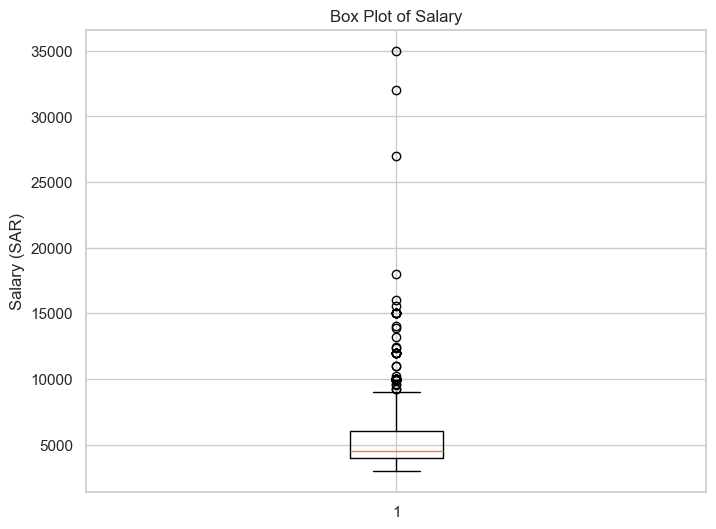

In [213]:
plt.figure(figsize=(8, 6))
plt.boxplot(jobs_df['salary (SAR)'])
plt.title('Box Plot of Salary')
plt.ylabel('Salary (SAR)')
plt.show()


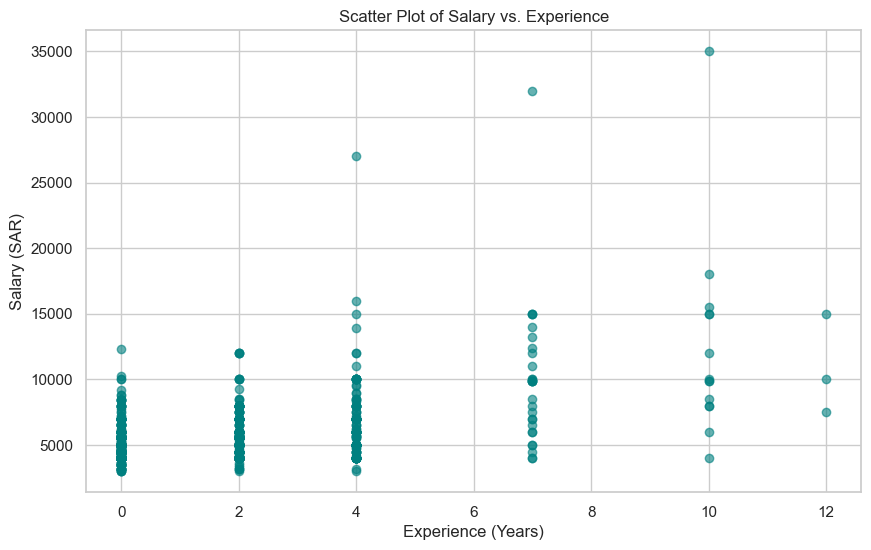

In [214]:
plt.figure(figsize=(10, 6))
plt.scatter(jobs_df['experience (years)'], jobs_df['salary (SAR)'], alpha=0.6, color='teal')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (SAR)')
plt.title('Scatter Plot of Salary vs. Experience')
plt.grid(True)
plt.show()


In [215]:
jobs_df.shape

(1352, 9)

In [216]:
Q1 = jobs_df['salary (SAR)'].quantile(0.25)
Q3 = jobs_df['salary (SAR)'].quantile(0.75)
IQR = Q3 - Q1
jobs_df = jobs_df[~((jobs_df['salary (SAR)'] < (Q1 - 1.5 * IQR)) | (jobs_df['salary (SAR)'] > (Q3 + 1.5 * IQR)))]


In [217]:
jobs_df.shape

(1292, 9)

In [218]:
jobs_df.head(2)

,job_title,comp_name,comp_no,region,city,contract,gender,salary (SAR),experience (years)
0,محاسب,شركة مقر العالم للسفريات,1-317262,الرياض,AR RIYADH...,دوام كامل,both,5000.0,0
1,بائع,شركة عالم الكهرباء للمقاولات,4-1324428,المنطقة الشرقية,AD DAMMAM...,دوام كامل,both,5000.0,0


# Q1

In [219]:
# Calculate the proportion of job postings by region
region_proportions = jobs_df['region'].value_counts(normalize=True) * 100

In [220]:
region_proportions

region
الرياض             42.492260
مكة المكرمة        24.922601
المنطقة الشرقية    15.015480
المدينة المنورة     5.727554
الباحة              3.250774
عسير                2.863777
القصيم              2.244582
حائل                1.160991
تبوك                0.773994
جازان               0.541796
نجران               0.541796
الحدود الشمالية     0.232198
الجوف               0.232198
Name: proportion, dtype: float64

In [238]:
import plotly.express as px

# Create a pie chart using Plotly for region proportions
fig = px.pie(values=region_proportions, names=region_proportions.index, 
             title='Proportion of Job Postings by Region in KSA', hole=0.3)

# Display the chart
fig.show()


### Insight on Job Postings by Region in KSA

The chart highlights the distribution of job postings across various regions in Saudi Arabia, showing a strong concentration in a few key areas:

- **Riyadh**: Leading with **42.5%** of total job postings, Riyadh dominates as the primary region for employment opportunities, reflecting its position as the capital and a major economic hub.
- **Makkah**: With **24.9%** of postings, Makkah follows Riyadh, indicating substantial job availability, likely due to its religious and economic significance.
- **Eastern Province**: Accounting for **15%** of postings, this region has a strong presence, possibly due to its industrial and oil sectors.
- **Smaller Regions**: Other regions like Al Madinah (5.73%), Al Bahah (3.25%), and Asir (2.86%) contribute smaller shares, suggesting fewer job openings relative to the larger cities.

Overall, job opportunities are heavily concentrated in Riyadh, Makkah, and the Eastern Province, while other regions see significantly fewer postings, which may reflect their economic size and industry diversity.


# Q2

In [222]:
# Create a Plotly pie chart for gender preferences
fig = px.pie(values=gender_preferences.values, names=gender_preferences.index,
             title="Gender Preferences in Job Postings", hole=0.3,
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Enhance the visual by customizing text and layout
fig.update_traces(textinfo='percent+label', pull=[0.1, 0, 0])

# Display the Plotly figure
fig.show()


### Insight on Gender Preferences in Job Postings

The pie chart shows the distribution of gender preferences in job postings, indicating an openness across genders:

- **Gender-Neutral Preference (Both)**: A significant portion of job postings, **38.9%**, are open to both male and female candidates, reflecting flexibility among employers.
- **Male-Preferred Roles**: Approximately **32.5%** of job postings specify a preference for male candidates, which might be due to job roles traditionally associated with male-dominated fields or industries.
- **Female-Preferred Roles**: About **28.6%** of job postings target female candidates, showing a notable demand for female talent in certain positions.

Overall, this distribution suggests a relatively balanced approach in gender-specific hiring, with a slightly higher preference for gender-neutral roles. This trend could indicate a growing inclusivity in the job market.


# Q3

In [223]:
jobs_df_zero_experience = jobs_df[jobs_df['experience (years)'] == 0]

In [224]:
jobs_df_zero_experience.shape

(760, 9)

In [225]:
# Calculate the salary range (min and max) for fresh graduates (0 experience) in jobs_df_zero_experience
jobs_df_zero_experience['salary (SAR)'].min(), jobs_df_zero_experience['salary (SAR)'].max()

(3000.0, 8803.0)

In [228]:
# Create a histogram using Plotly for the salary range of fresh graduates (0 experience)
fig = px.histogram(jobs_df_zero_experience, x='salary (SAR)', nbins=15, 
                   title='Salary Distribution for Fresh Graduates',
                   labels={'salary (SAR)': 'Salary (SAR)'})

# Customize layout
fig.update_layout(xaxis_title="Salary (SAR)", yaxis_title="Frequency", 
                  bargap=0.1)

# Show the figure
fig.show()


### Insight on Salary Distribution for Fresh Graduates

The histogram of salary distribution for fresh graduates (0 years of experience) reveals a significant concentration in the lower salary range:

- **Most frequent salary range**: The majority of fresh graduate job postings offer salaries around **4,000 SAR**, with this range having the highest frequency.
- **Lower salary tiers dominate**: There is a noticeable decline in job frequency as the salary increases, indicating that entry-level positions for fresh graduates tend to cluster in the lower salary brackets.
- **Smaller proportion in higher salary ranges**: Only a few positions offer salaries above 6,000 SAR, and very few approach the 9,000 SAR mark. 

This trend suggests that while there are opportunities for fresh graduates, most employers offer starting salaries in the lower range, which may reflect standard entry-level compensation expectations for inexperienced candidates.


# Q4

In [232]:
jobs_df_zero_experience.shape

(760, 9)

In [233]:
jobs_df_with_experience = jobs_df[jobs_df['experience (years)'] > 0]

In [234]:
jobs_df_with_experience.shape

(532, 9)

In [236]:
import pandas as pd
import plotly.express as px

# Data setup for job counts
experience_data = pd.DataFrame({
    'Experience Level': ['Fresh Graduates', 'With Experience'],
    'Job Count': [760, 532]
})

# Plotting the bar chart
fig = px.bar(experience_data, x='Experience Level', y='Job Count', 
             title='Job Opportunities for Fresh Graduates vs. Experienced Individuals',
             text='Job Count', color='Experience Level', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Enhance chart visuals
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title="Experience Level", yaxis_title="Number of Job Postings", showlegend=False)

fig.show()


### Insight on Job Opportunities for Fresh Graduates vs. Experienced Individuals

The visualization highlights that **job opportunities are slightly more available to fresh graduates** than to individuals with prior experience. With **760 positions** targeted at fresh graduates compared to **532 for experienced candidates**, this suggests a notable openness among employers toward hiring new talent without prior work experience.

#### Key Implications:
1. **Investment in Talent Development**: Companies appear willing to train and develop fresh talent, potentially valuing current skills and potential over previous experience for certain roles.
2. **Growth in Entry-Level Roles**: The demand for fresh graduates indicates that sectors may be expanding their entry-level positions, allowing recent graduates more access to the job market.

Overall, this trend is promising for recent graduates as it suggests there’s considerable room for entry-level hires, providing them with opportunities to gain practical experience and grow within the industry.
